# Introduction to OpenCV - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it

## Exercise 1: Invert Grayscale Image

####  Compute the *“negative”* of a  grayscale image (range of each pixel between [0 255]).  For each pixel having intensity I, modify its the value: 255-I. Download *"grayscale.jpg"* and test the program on it.

Read the image with shape:  (1080, 1920)


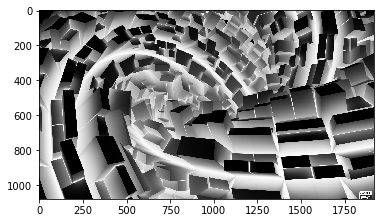

In [8]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image
gray = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)
print("Read the image with shape: ", gray.shape)

# Invert image
invert_gray = 255 - gray

# Display Image
plt.imshow(invert_gray, cmap='gray', vmin=0, vmax=255)

## Exercise 2: Invert RGB Image

#### Same as before, but in this case we want to compute the negative of a color image. The image has 3 channels, representing the 3 RGB values the intensity of each channel ranges between [0 255]. For each image pixel, we need to substitute the (B,G,R) triplet with its «inverse» *(255-B, 255-G, 255-R)*.  Download *"avenger.png"*and test the program on it.

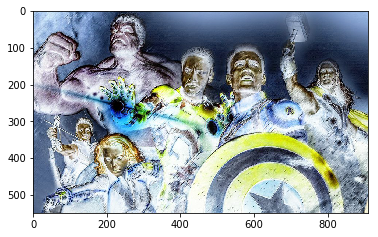

In [9]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image
image = cv2.imread("avengers.png")

# Invert image
invert_bgr = 255 - image

# Display Image
plt.imshow(invert_bgr)

## Exercise 3: Differences between Images

#### 1: Compute the pixel-wise difference between the two pictures Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Download and test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.

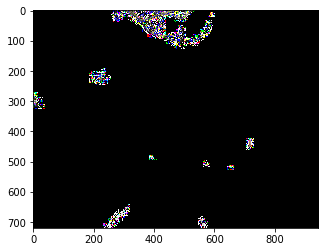

In [4]:
# Write here your solution
# Import libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Read images
image1 = cv2.imread("Differences/differences1.png")
image2 = cv2.imread("Differences/differences2.png")

# Perform Difference
abs_diff = np.abs(image1 - image2)

# Display Image
plt.imshow(cv2.cvtColor(abs_diff, cv2.COLOR_BGR2RGB))

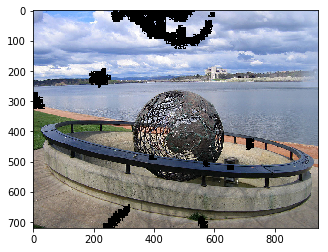

In [6]:
# Compute mean difference along last axis and mask image based on threshold
mean_rgb_diff = np.mean(abs_diff, axis=-1)
output_image = np.copy(image1)
output_image[mean_rgb_diff > 0] = 0

# Display Image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

In [7]:
# Save image on disk
cv2.imwrite("spot_the_difference.png", output_image)

True

## Exercise 4 [OPTIONAL]: Classify 7-Segments Display Digits

#### Classify a digits of the 7-segment display. 

<img src="7segments.png" width="128" height="256">

#### In a 7-segment display each segment can be ON or OFF. In a binary image we identify 255 (white) as ON and 0 (black) as OFF. The order of the 7-segments is depicted in the image above.

#### The combination of ON and OFF segments allows the display to show all possible digits from 0 to 9. A segment is defined ON if we have only white pixels (255) in that portion of an image. In test images each segment have a width of 20 pixels and an height of 128 pixels. Given a 256x128 digit image classify the correct number.

#### It is enough that the algorithm work on example images (a general solution is not required).

#### Download and test the program on digits images (1.png,  ..., 9.png). 

#### Tips ( Only if you need help): 
* Identify the correct location (rows, columns range) for each segment based on example images (1.png, 2.png, etc). 
* Understand which segment is ON and OFF and save the status of each segment
* Based on which segment is active look for the right digit

Active segments are:  [1, 1, 1, 1, 0, 1, 1]
The digits in the image is:  9


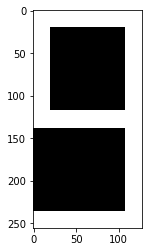

In [15]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Dictionary of ON segments for each possible digit. 
# The order follows the scheme of the image above.
# For instance, digit 1 have only the segments 2 and 5 ON (1) while the others OFF (0). 
SEGMENTS_DIGITS = {
(1, 1, 1, 0, 1, 1, 1): 0,
(0, 0, 1, 0, 0, 1, 0): 1,
(1, 0, 1, 1, 1, 0, 1): 2,
(1, 0, 1, 1, 0, 1, 1): 3,
(0, 1, 1, 1, 0, 1, 0): 4,
(1, 1, 0, 1, 0, 1, 1): 5,
(1, 1, 0, 1, 1, 1, 1): 6,
(1, 0, 1, 0, 0, 1, 0): 7,
(1, 1, 1, 1, 1, 1, 1): 8,
(1, 1, 1, 1, 0, 1, 1): 9
}

# List to track active elements
active_segments = [0,0,0,0,0,0,0]

# Total number of pixels per segments
num_pixels_segment = 20*128
# Total sum of pixel values per segments
sum_segment = num_pixels_segment * 255

# Reading a digit image
image = cv2.imread("Digits/9.png" ,cv2.IMREAD_GRAYSCALE)

# Check what segment is active
s = np.sum(image[0:20,:])
if s == sum_segment:
    active_segments[0] = 1
    
s = np.sum(image[0:128,0:20]) 
if s == sum_segment:
    active_segments[1] = 1

s = np.sum(image[0:128,-20:]) 
if s == sum_segment:
    active_segments[2] = 1
    
s = np.sum(image[118:138,:]) 
if s == sum_segment:
    active_segments[3] = 1
    
s = np.sum(image[128:,0:20]) 
if s == sum_segment:
    active_segments[4] = 1
    
s = np.sum(image[128:,-20:]) 
if s == sum_segment:
    active_segments[5] = 1
    
s = np.sum(image[-20:,:]) 
if s == sum_segment:
    active_segments[6] = 1


print("Active segments are: ", active_segments)

# Get the result from the dictionary
result = SEGMENTS_DIGITS[tuple(active_segments)]

# Display Result
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
print("The digits in the image is: ", result)